In [ ]:
# Import all required files
import pandas as pd          # For data manipulation and analysis
import numpy as np           # For numerical operations
import matplotlib.pyplot as plt  # For creating visualizations
import seaborn as sns        # For statistical data visualization

In [ ]:
# File uploading
from google.colab import files
uploaded = files.upload()

Saving Portuguese.csv to Portuguese.csv


In [ ]:
# Load the uploaded file into a pandas DataFrame (handles Excel/CSV format)
file_name = list(uploaded.keys())[0]
try:
    df = pd.read_excel(file_name)
except:
    df = pd.read_csv(file_name)
print(f"Dataset loaded: {df.shape[0]} rows × {df.shape[1]} columns")

Dataset loaded: 651 rows × 33 columns


In [ ]:
# Display the first 5 rows to understand the data structure
print("First 5 rows of the dataset:")
df.head()

First 5 rows of the dataset:


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [ ]:
# Display dataset information including column names and data types
print("Dataset Information:")
df.info()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651 entries, 0 to 650
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      651 non-null    object
 1   sex         651 non-null    object
 2   age         651 non-null    int64 
 3   address     651 non-null    object
 4   famsize     651 non-null    object
 5   Pstatus     651 non-null    object
 6   Medu        651 non-null    int64 
 7   Fedu        651 non-null    int64 
 8   Mjob        651 non-null    object
 9   Fjob        651 non-null    object
 10  reason      651 non-null    object
 11  guardian    651 non-null    object
 12  traveltime  651 non-null    int64 
 13  studytime   651 non-null    int64 
 14  failures    651 non-null    int64 
 15  schoolsup   651 non-null    object
 16  famsup      651 non-null    object
 17  paid        651 non-null    object
 18  activities  651 non-null    object
 19  nursery     651 non-null    o

In [ ]:
# Display statistical summary of all numerical columns
print("Statistical Summary:")
df.describe()

Statistical Summary:


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,651.000000,651.000000,651.000000,651.000000,651.000000,651.000000,651.000000,651.00000,651.000000,651.000000,651.000000,651.000000,651.000000,651.000000,651.000000,651.000000
mean,16.745008,2.516129,2.308756,1.569892,1.930876,0.221198,3.930876,3.18126,3.187404,1.500768,2.276498,3.537634,3.654378,11.382488,11.569892,11.904762
std,1.217609,1.134481,1.100308,0.747889,0.828241,0.592449,0.954253,1.04999,1.174824,0.923830,1.284362,1.445326,4.635853,2.777315,2.909287,3.225880
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.00000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.00000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.00000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


In [ ]:
# Check for missing values in each column
print("Missing Values per Column:")
missing = df.isnull().sum()
print(missing[missing > 0] if missing.sum() > 0 else "No missing values found!")

Missing Values per Column:
No missing values found!


In [ ]:
# Check for and remove duplicate rows if any exist
duplicates = df.duplicated().sum()
print(f"Duplicate rows found: {duplicates}")
if duplicates > 0:
    df = df.drop_duplicates()
    print(f"Duplicates removed. New shape: {df.shape}")

Duplicate rows found: 2
Duplicates removed. New shape: (649, 33)


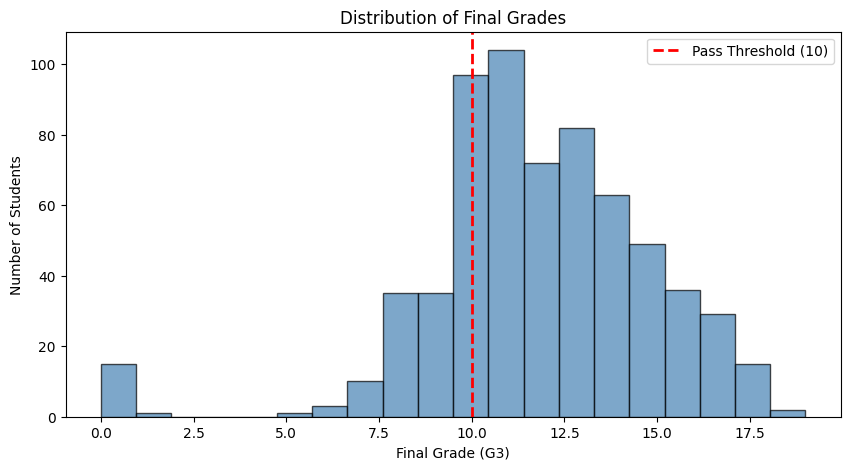

In [ ]:
# Visualize the distribution of final grades (G3) with pass threshold line
plt.figure(figsize=(10, 5))
plt.hist(df['G3'], bins=20, color='steelblue', edgecolor='black', alpha=0.7)
plt.axvline(x=10, color='red', linestyle='--', linewidth=2, label='Pass Threshold (10)')
plt.xlabel('Final Grade (G3)')
plt.ylabel('Number of Students')
plt.title('Distribution of Final Grades')
plt.legend()
plt.show()

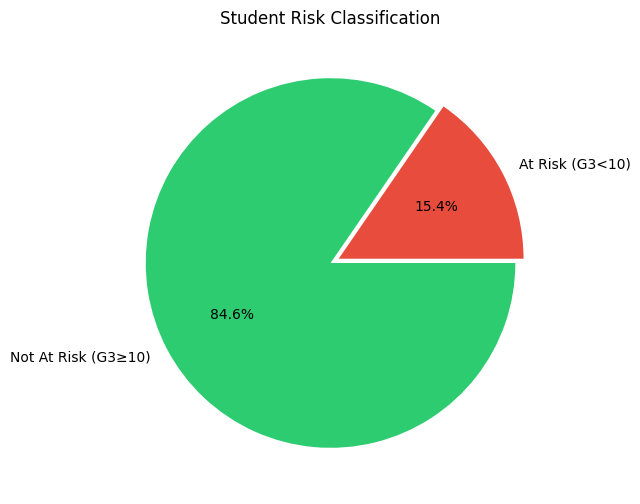

At Risk: 100 | Not At Risk: 549


In [ ]:
# Create pie chart showing risk classification (At Risk vs Not At Risk)
risk_counts = [(df['G3'] < 10).sum(), (df['G3'] >= 10).sum()]
labels = ['At Risk (G3<10)', 'Not At Risk (G3≥10)']
colors = ['#e74c3c', '#2ecc71']
plt.figure(figsize=(8, 6))
plt.pie(risk_counts, labels=labels, autopct='%1.1f%%', colors=colors, explode=(0.05, 0))
plt.title('Student Risk Classification')
plt.show()
print(f"At Risk: {risk_counts[0]} | Not At Risk: {risk_counts[1]}")

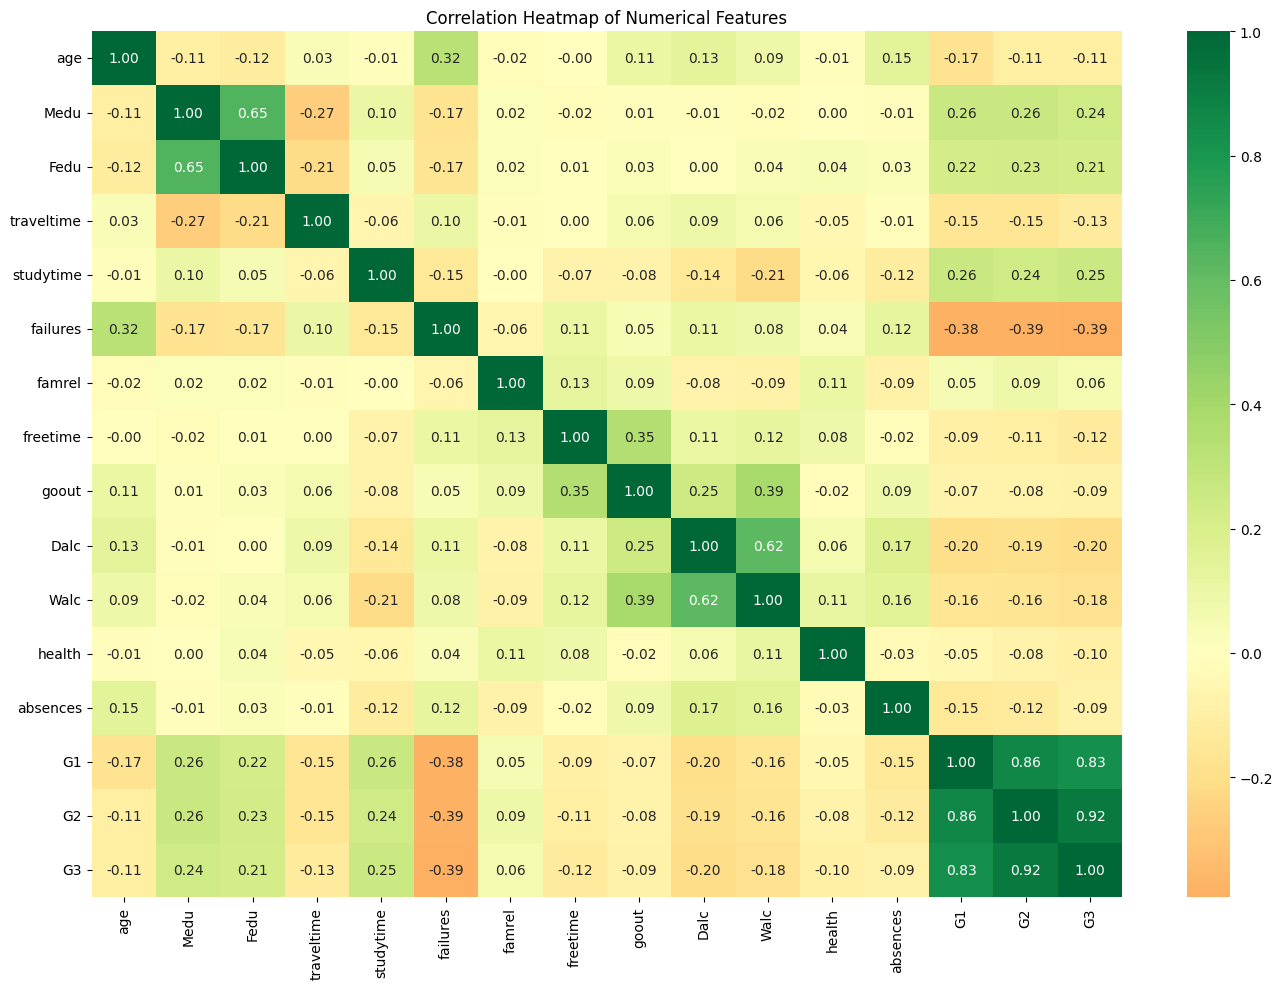

In [ ]:
# Create correlation heatmap to identify relationships between features
numerical_cols = df.select_dtypes(include=[np.number]).columns
plt.figure(figsize=(14, 10))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='RdYlGn', center=0, fmt='.2f')
plt.title('Correlation Heatmap of Numerical Features')
plt.tight_layout()
plt.show()

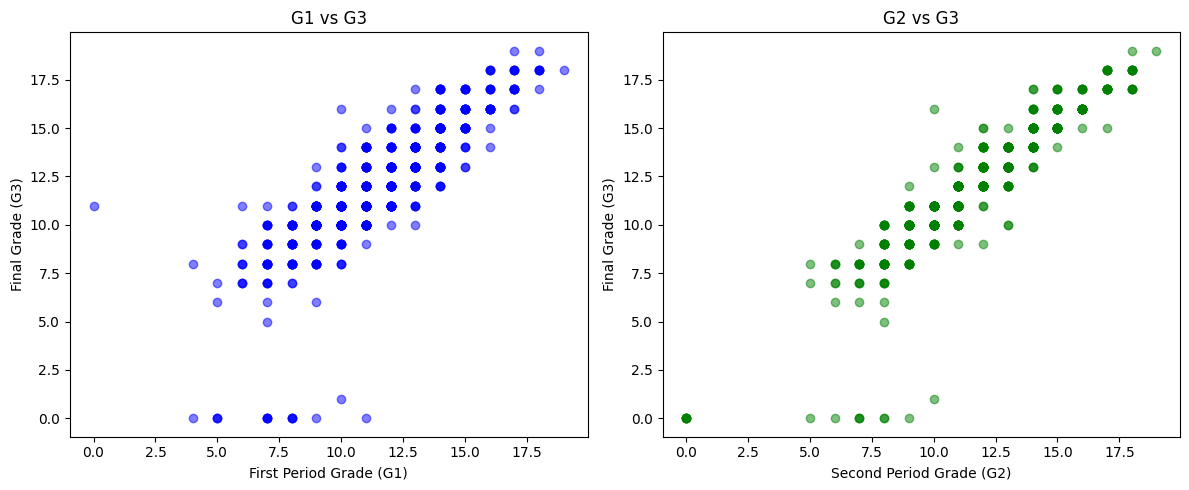

In [ ]:
# Scatter plots showing grade progression from G1 to G2 to G3
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
axes[0].scatter(df['G1'], df['G3'], alpha=0.5, c='blue')
axes[0].set_xlabel('First Period Grade (G1)')
axes[0].set_ylabel('Final Grade (G3)')
axes[0].set_title('G1 vs G3')
axes[1].scatter(df['G2'], df['G3'], alpha=0.5, c='green')
axes[1].set_xlabel('Second Period Grade (G2)')
axes[1].set_ylabel('Final Grade (G3)')
axes[1].set_title('G2 vs G3')
plt.tight_layout()
plt.show()

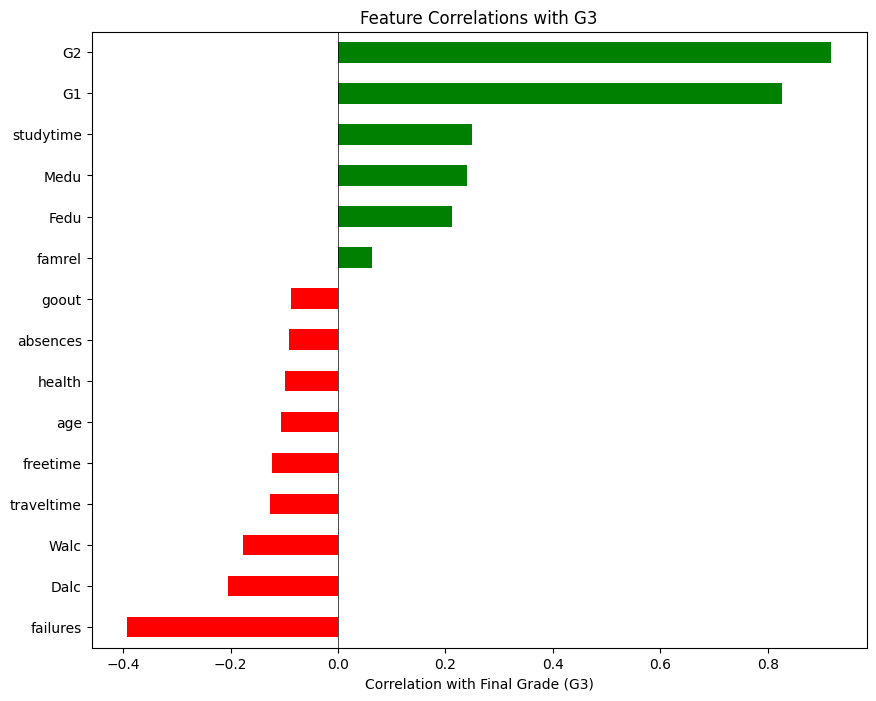

In [ ]:
# Bar chart showing correlation of each feature with final grade G3
correlations = df[numerical_cols].corr()['G3'].drop('G3').sort_values()
plt.figure(figsize=(10, 8))
colors = ['green' if x > 0 else 'red' for x in correlations]
correlations.plot(kind='barh', color=colors)
plt.xlabel('Correlation with Final Grade (G3)')
plt.title('Feature Correlations with G3')
plt.axvline(x=0, color='black', linewidth=0.5)
plt.show()

In [ ]:
# Display all categorical columns and their unique values
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print("Categorical Columns:")
for col in categorical_cols:
    print(f"{col}: {df[col].unique().tolist()}")

Categorical Columns:
school: ['GP', 'MS']
sex: ['F', 'M']
address: ['U', 'R']
famsize: ['GT3', 'LE3']
Pstatus: ['A', 'T']
Mjob: ['at_home', 'health', 'other', 'services', 'teacher']
Fjob: ['teacher', 'other', 'services', 'health', 'at_home']
reason: ['course', 'other', 'home', 'reputation']
guardian: ['mother', 'father', 'other']
schoolsup: ['yes', 'no']
famsup: ['no', 'yes']
paid: ['no', 'yes']
activities: ['no', 'yes']
nursery: ['yes', 'no']
higher: ['yes', 'no']
internet: ['no', 'yes']
romantic: ['no', 'yes']


In [ ]:
# Define the 12 most important features for the prediction model
selected_features = ['G1', 'G2', 'studytime', 'failures', 'absences',
                     'schoolsup', 'famsup', 'paid', 'internet', 'higher',
                     'health', 'goout']
print("Selected Features for Model:")
for i, f in enumerate(selected_features, 1):
    print(f"{i}. {f}")

Selected Features for Model:
1. G1
2. G2
3. studytime
4. failures
5. absences
6. schoolsup
7. famsup
8. paid
9. internet
10. higher
11. health
12. goout


In [ ]:
# Create binary Risk label (1 = At Risk if G3 < 10, 0 = Not At Risk)
df['Risk'] = (df['G3'] < 10).astype(int)
print("Target Variable 'Risk' Created:")
print(f"  At Risk (1): {df['Risk'].sum()} students")
print(f"  Not At Risk (0): {(df['Risk'] == 0).sum()} students")

Target Variable 'Risk' Created:
  At Risk (1): 100 students
  Not At Risk (0): 549 students


In [ ]:
# Encode categorical yes/no columns to numerical 1/0 values
from sklearn.preprocessing import LabelEncoder
df_encoded = df.copy()
binary_cols = ['schoolsup', 'famsup', 'paid', 'internet', 'higher']
print("Encoding categorical variables:")
for col in binary_cols:
    le = LabelEncoder()
    original = df_encoded[col].unique()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    print(f"   {col}: {list(original)} → {list(df_encoded[col].unique())}")

Encoding categorical variables:
   schoolsup: ['yes', 'no'] → [np.int64(1), np.int64(0)]
   famsup: ['no', 'yes'] → [np.int64(0), np.int64(1)]
   paid: ['no', 'yes'] → [np.int64(0), np.int64(1)]
   internet: ['no', 'yes'] → [np.int64(0), np.int64(1)]
   higher: ['yes', 'no'] → [np.int64(1), np.int64(0)]


In [ ]:
# Create final cleaned dataset with only selected features and target
final_columns = selected_features + ['G3', 'Risk']
df_cleaned = df_encoded[final_columns].copy()
print(f"Cleaned dataset shape: {df_cleaned.shape}")
print(f"Columns: {df_cleaned.columns.tolist()}")
df_cleaned.head()

Cleaned dataset shape: (649, 14)
Columns: ['G1', 'G2', 'studytime', 'failures', 'absences', 'schoolsup', 'famsup', 'paid', 'internet', 'higher', 'health', 'goout', 'G3', 'Risk']


,G1,G2,studytime,failures,absences,schoolsup,famsup,paid,internet,higher,health,goout,G3,Risk
0,0,11,2,0,4,1,0,0,0,1,3,4,11,0
1,9,11,2,0,2,0,1,0,1,1,3,3,11,0
2,12,13,2,0,6,1,0,0,1,1,3,2,12,0
3,14,14,3,0,0,0,1,0,1,1,5,2,14,0
4,11,13,2,0,0,0,1,0,0,1,5,2,13,0


In [ ]:
# Save the cleaned dataset as CSV file
df_cleaned.to_csv('Portuguese_cleaned.csv', index=False)
print("Cleaned dataset saved as 'Portuguese_cleaned.csv'")

Cleaned dataset saved as 'Portuguese_cleaned.csv'
